Import Packages

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load the Data

In [2]:
parent_dir = '../../data/thread_ring/'

N = 100_000
R = 10_000_000
ITERATIONS = 15
# Load Scala benchmark data
scala_idle_raw_data = pd.read_csv(f'{parent_dir}3/thread_ring_akka_actor_benchmark_idle_power.csv')
scala_bench_raw_data = pd.read_csv(f'{parent_dir}3/thread_ring_akka_actor_benchmark_power_metrics.csv')

# Load Erlang benchmark data
erlang_idle_raw_data = pd.read_csv(f'{parent_dir}3/thread_ring_benchmark_idle_power.csv')
erlang_bench_raw_data = pd.read_csv(f'{parent_dir}3/thread_ring_benchmark_power_metrics.csv')

# Replace empty or missing values with "N/A" in non-numeric columns
scala_idle_raw_data.fillna("N/A", inplace=True)
scala_bench_raw_data.fillna("N/A", inplace=True)
erlang_idle_raw_data.fillna("N/A", inplace=True)
erlang_bench_raw_data.fillna("N/A", inplace=True)

Preview the Data

In [3]:
print("Scala Idle Raw Data:")
print(scala_idle_raw_data.shape)
scala_idle_raw_data.head()

Scala Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Mar 23 10:31:17 2025 +0100) (510.25ms ela...,4.76,0.0788,0.824,5.62,0.74,41.96,57.00 C,Nominal
1,(Sun Mar 23 10:31:17 2025 +0100) (506.57ms ela...,8.79,0.1080,1.450,10.51,1.49,84.90,57.00 C,Nominal
2,(Sun Mar 23 10:31:18 2025 +0100) (506.67ms ela...,11.50,0.1290,1.410,12.99,1.74,95.94,56.73 C,Nominal
3,(Sun Mar 23 10:31:18 2025 +0100) (505.60ms ela...,14.70,0.0555,1.540,15.99,2.17,98.82,56.73 C,Nominal
4,(Sun Mar 23 10:31:19 2025 +0100) (506.16ms ela...,9.85,0.0000,0.916,10.71,1.65,99.19,56.50 C,Nominal


In [4]:
print("Scala Benchmark Raw Data:")
print(scala_bench_raw_data.shape)
scala_bench_raw_data.head()

Scala Benchmark Raw Data:
(85, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Mar 23 10:31:29 2025 +0100) (1008.71ms el...,40.3,0.1230,1.490,43.46,3.97,99.46,55.34 C,Nominal
1,(Sun Mar 23 10:31:30 2025 +0100) (1004.62ms el...,38.7,0.0653,1.130,42.15,3.96,99.26,64.16 C,Nominal
2,(Sun Mar 23 10:31:31 2025 +0100) (1004.72ms el...,35.4,0.0219,0.744,38.09,3.77,97.08,66.69 C,Nominal
3,(Sun Mar 23 10:31:32 2025 +0100) (1004.78ms el...,35.7,0.0000,0.569,38.17,3.77,97.84,68.95 C,Nominal
4,(Sun Mar 23 10:31:33 2025 +0100) (1004.57ms el...,36.0,0.0000,0.565,38.55,3.78,98.36,71.00 C,Nominal


In [5]:
print("Erlang Idle Raw Data:")
print(erlang_idle_raw_data.shape)
erlang_idle_raw_data.head()

Erlang Idle Raw Data:
(10, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Mar 23 10:38:56 2025 +0100) (510.92ms ela...,5.140,0.0521,0.687,5.76,0.71,42.54,48.89 C,Nominal
1,(Sun Mar 23 10:38:56 2025 +0100) (506.35ms ela...,6.760,0.0477,0.780,7.43,0.92,49.89,48.89 C,Nominal
2,(Sun Mar 23 10:38:57 2025 +0100) (505.94ms ela...,6.510,0.1070,1.080,7.60,1.20,70.93,48.91 C,Nominal
3,(Sun Mar 23 10:38:57 2025 +0100) (506.28ms ela...,6.160,0.0280,0.770,7.07,1.23,99.91,48.91 C,Nominal
4,(Sun Mar 23 10:38:58 2025 +0100) (506.88ms ela...,0.551,0.0000,0.384,0.87,0.33,21.62,48.88 C,Nominal


In [6]:
print("Erlang Benchmark Raw Data:")
print(erlang_bench_raw_data.shape)
erlang_bench_raw_data.head()

Erlang Benchmark Raw Data:
(93, 9)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level
0,(Sun Mar 23 10:39:08 2025 +0100) (1010.04ms el...,22.90,0.0547,1.28,25.21,2.81,96.96,49.33 C,Nominal
1,(Sun Mar 23 10:39:09 2025 +0100) (1005.38ms el...,15.90,0.0799,1.41,19.30,1.77,96.74,52.57 C,Nominal
2,(Sun Mar 23 10:39:10 2025 +0100) (1007.28ms el...,10.80,0.0193,1.19,13.84,1.22,98.45,54.09 C,Nominal
3,(Sun Mar 23 10:39:11 2025 +0100) (1007.58ms el...,9.94,0.0000,1.19,12.94,1.02,98.86,55.11 C,Nominal
4,(Sun Mar 23 10:39:12 2025 +0100) (1007.45ms el...,10.00,0.0000,1.15,13.01,1.02,98.90,56.48 C,Nominal


Clean the Data

In [7]:
def clean_data(df):
    df_copy = df.copy() 
    
    # Convert Timestamp to datetime format (extract date-time pattern)
    df_copy['Timestamp'] = pd.to_datetime(
        df['Timestamp'].str.extract(r'(\w{3} \w{3} \d{1,2} \d{2}:\d{2}:\d{2} \d{4})')[0], 
        errors='coerce'
    )

    # Extract elapsed time in milliseconds
    df_copy['Time Elapsed (ms)'] = pd.to_numeric(
        df['Timestamp'].str.extract(r'\((\d+\.\d+)ms elapsed\)')[0], 
        errors='coerce'
    )
    
    # Extract numeric temperature values
    df_copy['CPU Temp(C)'] = df['CPU Temp(C)'].str.extract(r'(\d+\.\d+|\d+)').astype(float)

    # Fill N/A values with 0 for numerical columns
    df_copy = df_copy.fillna(0)
    
    return df_copy

In [8]:
scala_idle_data = clean_data(scala_idle_raw_data)
scala_bench_data = clean_data(scala_bench_raw_data)
erlang_idle_data = clean_data(erlang_idle_raw_data)
erlang_bench_data = clean_data(erlang_bench_raw_data)

Verify Cleaned Data

In [9]:
print("Scala Idle Clean Data:")
print(scala_idle_data.shape)
scala_idle_data.head()

Scala Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-23 10:31:17,4.76,0.0788,0.824,5.62,0.74,41.96,57.00,Nominal,510.25
1,2025-03-23 10:31:17,8.79,0.1080,1.450,10.51,1.49,84.90,57.00,Nominal,506.57
2,2025-03-23 10:31:18,11.50,0.1290,1.410,12.99,1.74,95.94,56.73,Nominal,506.67
3,2025-03-23 10:31:18,14.70,0.0555,1.540,15.99,2.17,98.82,56.73,Nominal,505.60
4,2025-03-23 10:31:19,9.85,0.0000,0.916,10.71,1.65,99.19,56.50,Nominal,506.16


In [10]:
print("Scala Benchmark Clean Data:")
print(scala_bench_data.shape)
scala_bench_data.head()


Scala Benchmark Clean Data:
(85, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-23 10:31:29,40.3,0.1230,1.490,43.46,3.97,99.46,55.34,Nominal,1008.71
1,2025-03-23 10:31:30,38.7,0.0653,1.130,42.15,3.96,99.26,64.16,Nominal,1004.62
2,2025-03-23 10:31:31,35.4,0.0219,0.744,38.09,3.77,97.08,66.69,Nominal,1004.72
3,2025-03-23 10:31:32,35.7,0.0000,0.569,38.17,3.77,97.84,68.95,Nominal,1004.78
4,2025-03-23 10:31:33,36.0,0.0000,0.565,38.55,3.78,98.36,71.00,Nominal,1004.57


In [11]:
print("Erlang Idle Clean Data:")
print(erlang_idle_data.shape)
erlang_idle_data.head()


Erlang Idle Clean Data:
(10, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-23 10:38:56,5.140,0.0521,0.687,5.76,0.71,42.54,48.89,Nominal,510.92
1,2025-03-23 10:38:56,6.760,0.0477,0.780,7.43,0.92,49.89,48.89,Nominal,506.35
2,2025-03-23 10:38:57,6.510,0.1070,1.080,7.60,1.20,70.93,48.91,Nominal,505.94
3,2025-03-23 10:38:57,6.160,0.0280,0.770,7.07,1.23,99.91,48.91,Nominal,506.28
4,2025-03-23 10:38:58,0.551,0.0000,0.384,0.87,0.33,21.62,48.88,Nominal,506.88


In [12]:
print("Erlang Benchmark Clean Data:")
print(erlang_bench_data.shape)
erlang_bench_data.head()

Erlang Benchmark Clean Data:
(93, 10)


,Timestamp,CPU Core Power(W),GT Power(W),DRAM Power(W),(CPUs+GT+SA) Power(W),Avg Num Cores Active,Cores Active(%),CPU Temp(C),Pressure Level,Time Elapsed (ms)
0,2025-03-23 10:39:08,22.90,0.0547,1.28,25.21,2.81,96.96,49.33,Nominal,1010.04
1,2025-03-23 10:39:09,15.90,0.0799,1.41,19.30,1.77,96.74,52.57,Nominal,1005.38
2,2025-03-23 10:39:10,10.80,0.0193,1.19,13.84,1.22,98.45,54.09,Nominal,1007.28
3,2025-03-23 10:39:11,9.94,0.0000,1.19,12.94,1.02,98.86,55.11,Nominal,1007.58
4,2025-03-23 10:39:12,10.00,0.0000,1.15,13.01,1.02,98.90,56.48,Nominal,1007.45


Visualize the Data

In [13]:
def plot_graphs(idle_df, bench_df, title_prefix):
    """
    Creates side-by-side subplots for each metric, plotting idle (left) and benchmark (right),
    using elapsed time on the x-axis.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    idle_df = idle_df.copy()
    bench_df = bench_df.copy()
    

    # Compute elapsed time starting from t=0
    idle_df["Elapsed Time (s)"] = (idle_df["Time Elapsed (ms)"].cumsum() - idle_df["Time Elapsed (ms)"].iloc[0]) / 1000
    bench_df["Elapsed Time (s)"] = (bench_df["Time Elapsed (ms)"].cumsum() - bench_df["Time Elapsed (ms)"].iloc[0]) / 1000

    for column in columns_to_plot:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))

        # Plot Idle data on the first subplot
        sns.lineplot(data=idle_df, x="Elapsed Time (s)", y=column, label="Idle", color='blue', linestyle='--', ax=axes[0])
        axes[0].set_title(f"Idle - {column}", fontsize=12)
        axes[0].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[0].set_ylabel(column, fontsize=10)
        axes[0].legend()
        axes[0].grid(True)

        # Plot Benchmark data on the second subplot
        sns.lineplot(data=bench_df, x="Elapsed Time (s)", y=column, label="Benchmark", color='red', ax=axes[1])
        axes[1].set_title(f"Benchmark - {column}", fontsize=12)
        axes[1].set_xlabel("Elapsed Time (s)", fontsize=10)
        axes[1].set_ylabel(column, fontsize=10)
        axes[1].legend()
        axes[1].grid(True)

        # Main figure title
        fig.suptitle(f"{title_prefix} - {column}", fontsize=14)
        
        # Adjust layout to avoid overlap
        plt.tight_layout(rect=[0, 0, 1, 0.95]) 
        plt.show()


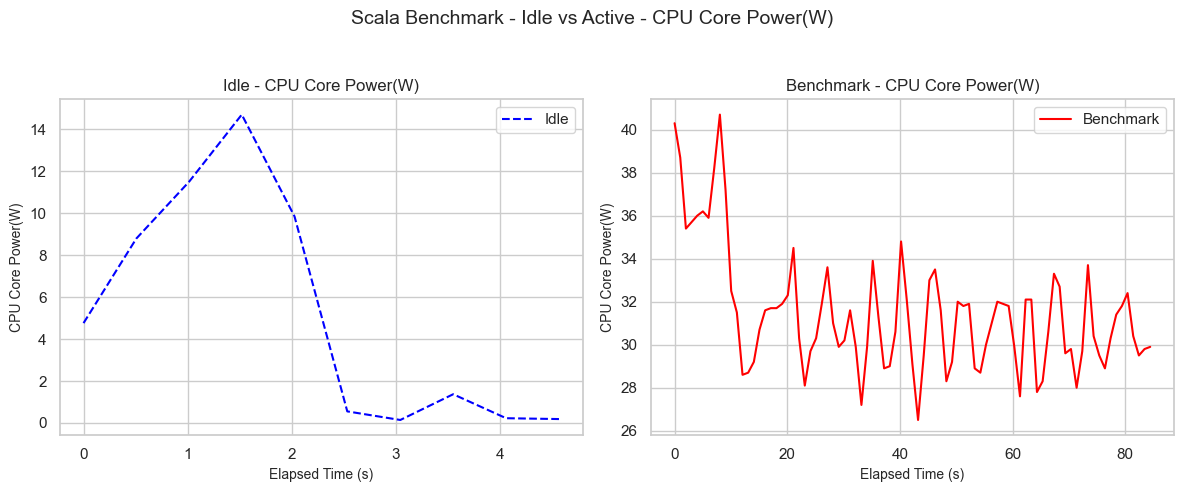

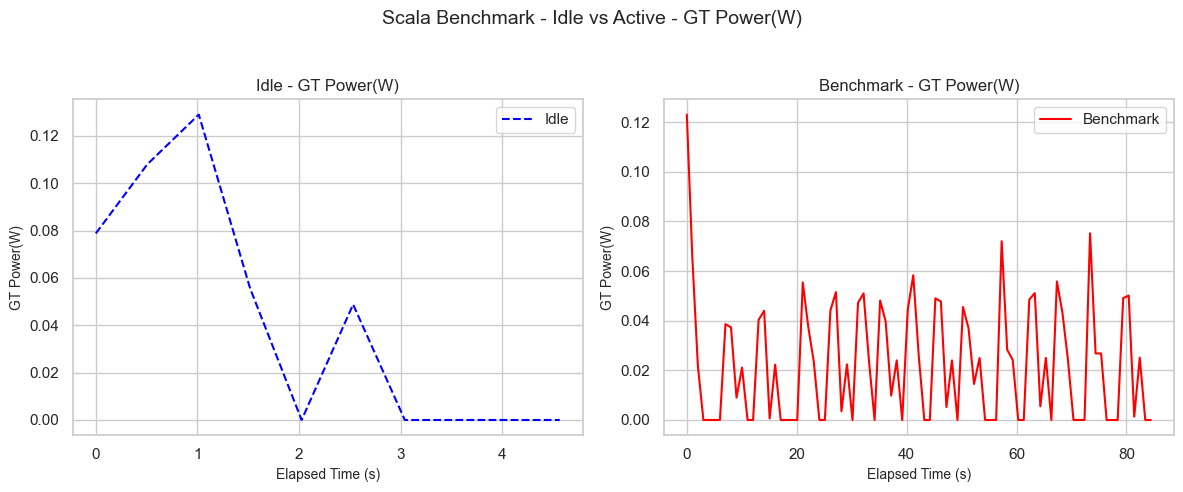

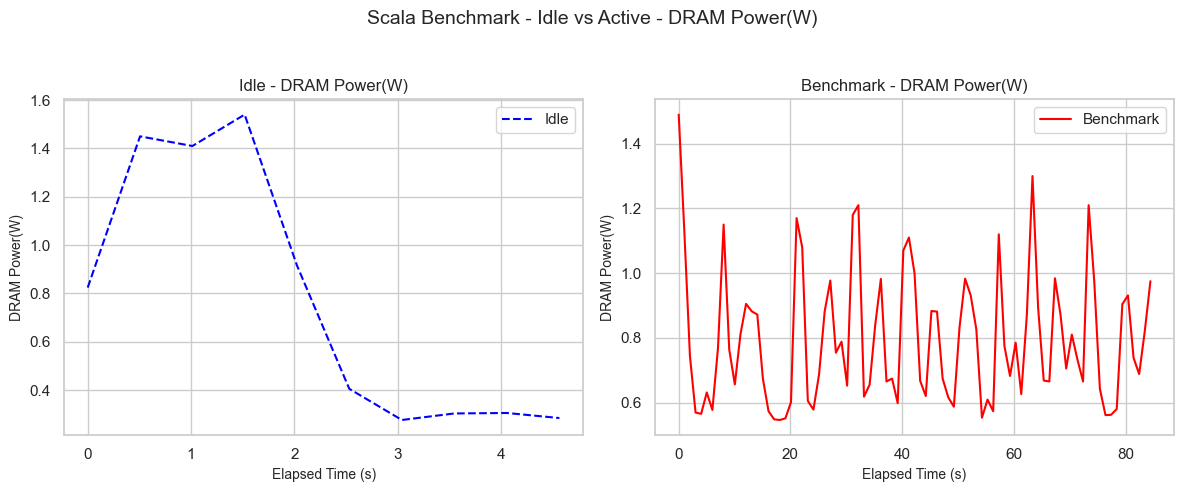

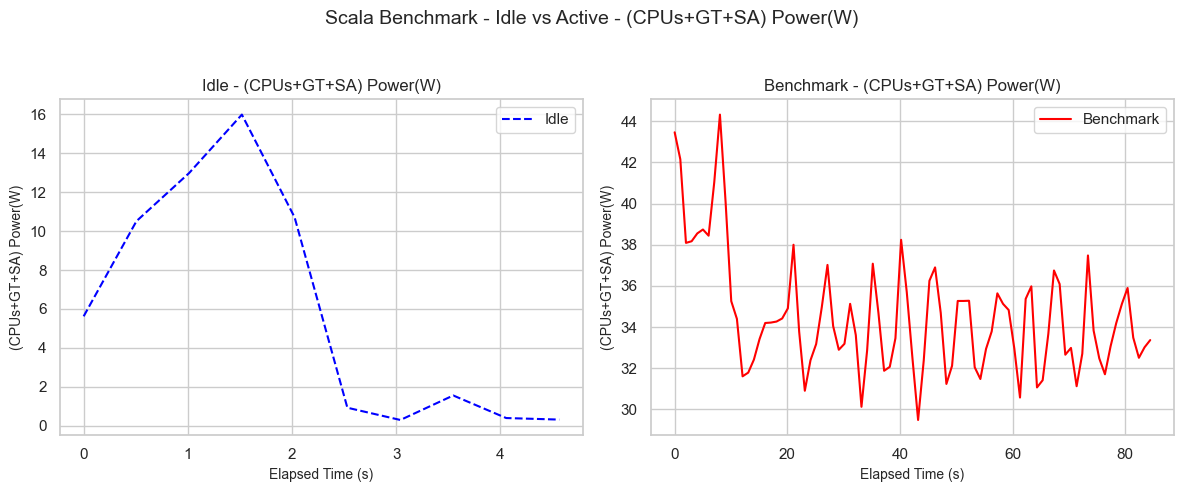

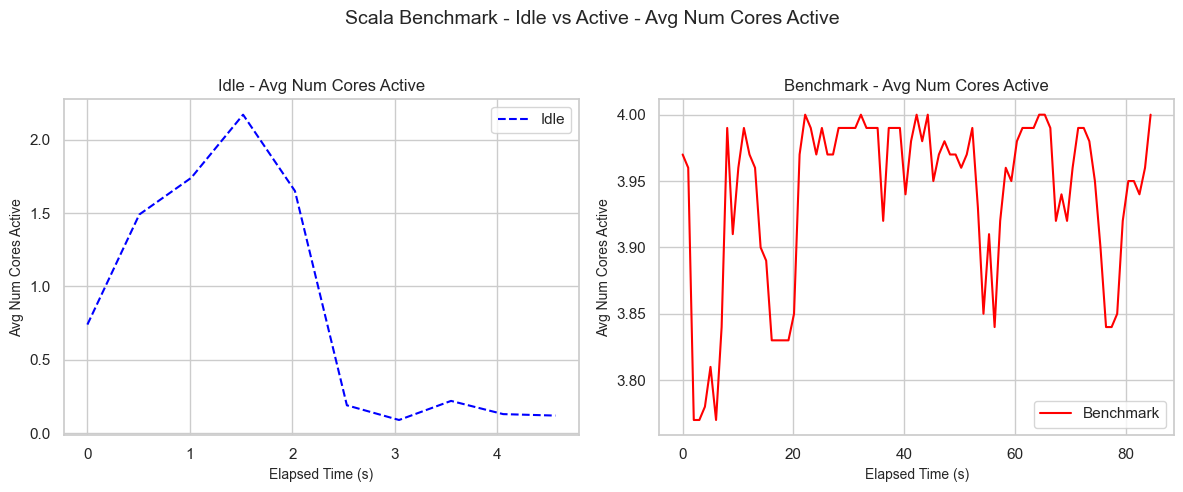

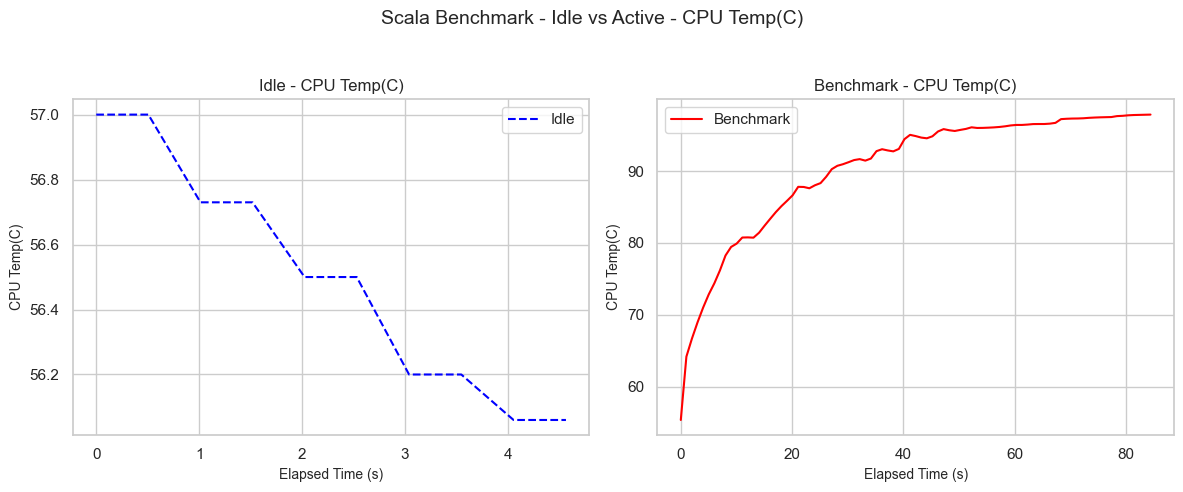

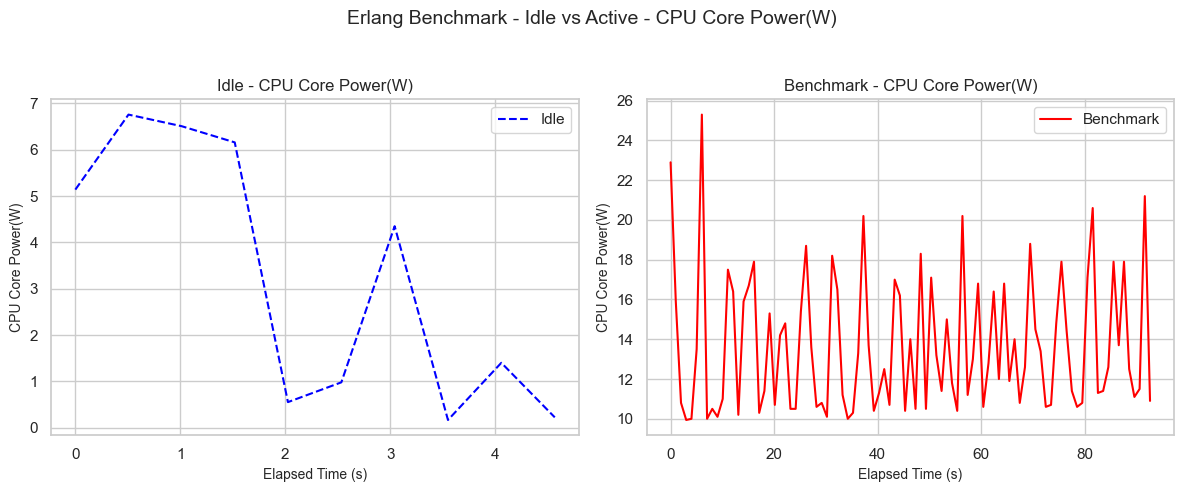

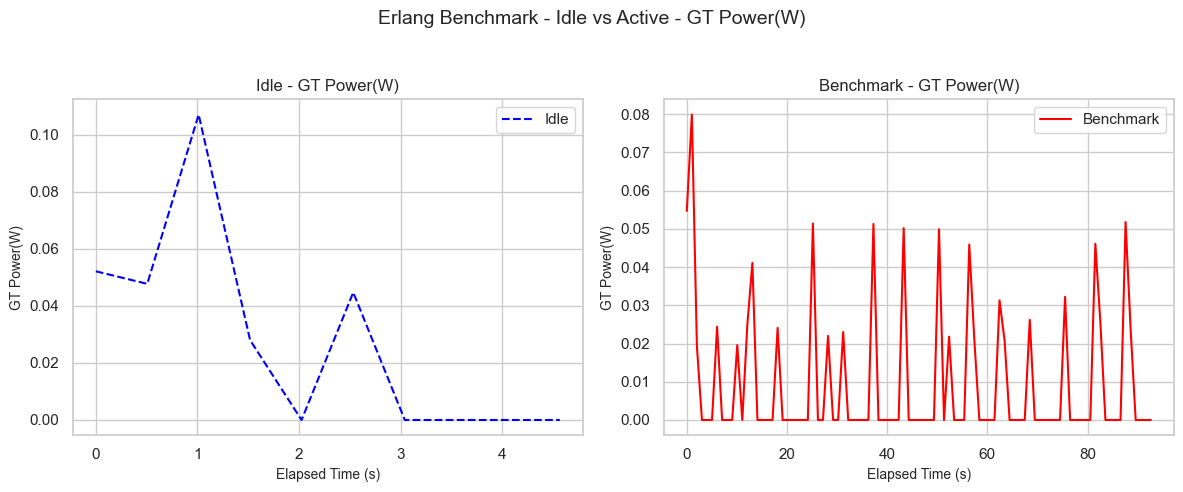

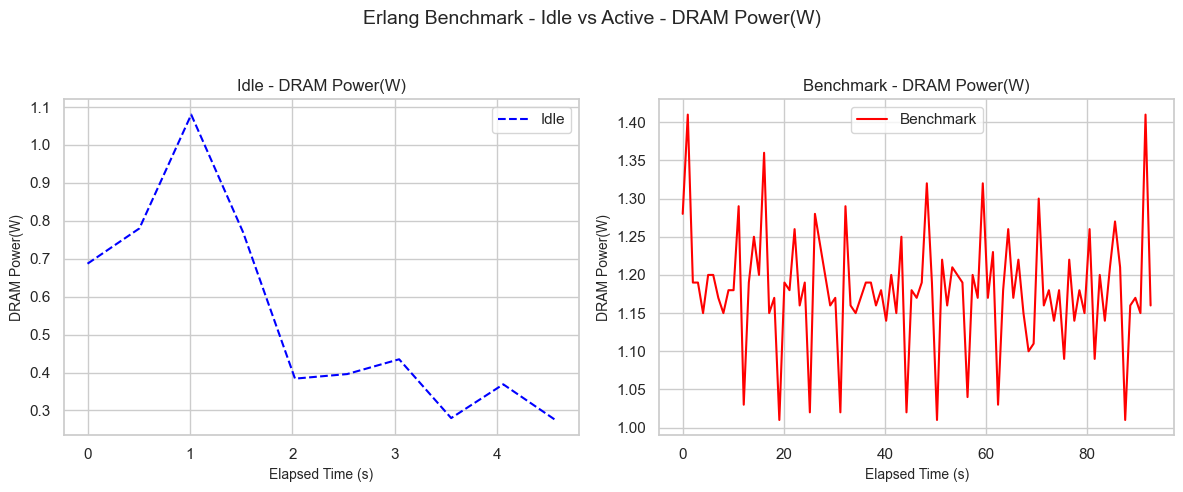

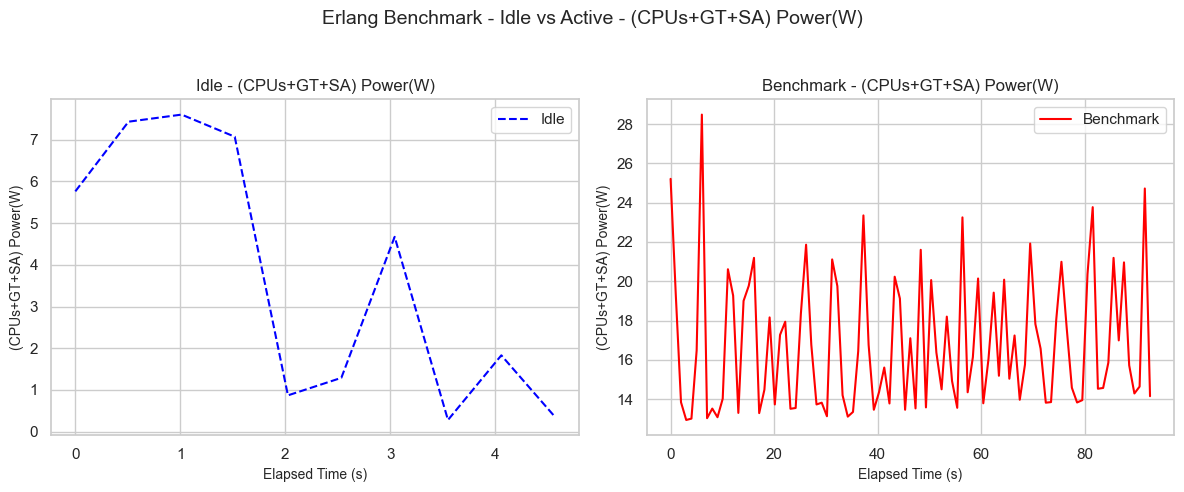

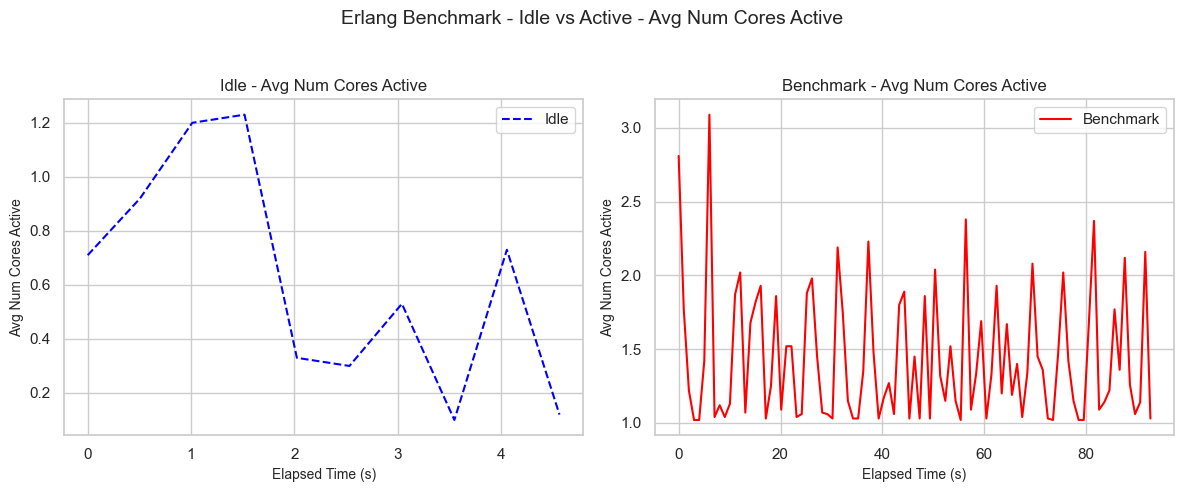

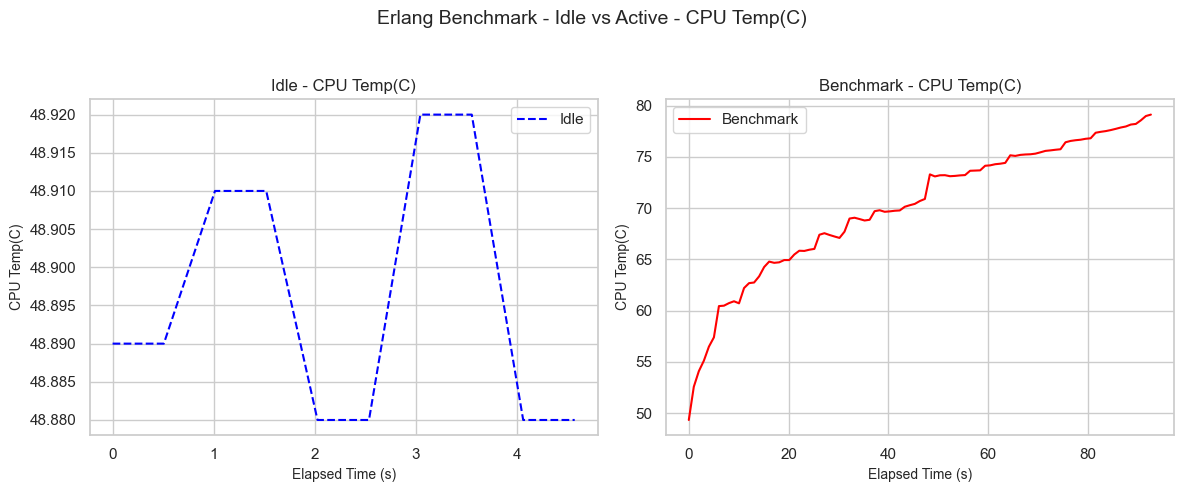

In [14]:
plot_graphs(scala_idle_data, scala_bench_data, "Scala Benchmark - Idle vs Active")
plot_graphs(erlang_idle_data, erlang_bench_data, "Erlang Benchmark - Idle vs Active")

In [15]:
def plot_erlang_vs_scala(erlang_df, scala_df, idle_erlang_df, idle_scala_df, title_prefix):
    """
    Plots Erlang and Scala benchmark data with elapsed time starting at t=0,
    after subtracting corresponding idle values.
    """
    columns_to_plot = [
        "CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", 
        "(CPUs+GT+SA) Power(W)", "Avg Num Cores Active", "CPU Temp(C)"
    ]

    sns.set_theme(style="whitegrid", palette="muted")

    # Create a copy of the dataframes to avoid modifying the original data
    erlang_df = erlang_df.copy()
    scala_df = scala_df.copy()

    # Normalize elapsed time to start from t=0
    erlang_df["Elapsed Time (s)"] = (erlang_df["Time Elapsed (ms)"].cumsum() - erlang_df["Time Elapsed (ms)"].iloc[0]) / 1000
    scala_df["Elapsed Time (s)"] = (scala_df["Time Elapsed (ms)"].cumsum() - scala_df["Time Elapsed (ms)"].iloc[0]) / 1000


    for column in columns_to_plot:
        fig, ax = plt.subplots(figsize=(10, 5))

        # Subtract idle values
        erlang_df["Adjusted " + column] = np.maximum(0, erlang_df[column] - idle_erlang_df[column].mean())
        scala_df["Adjusted " + column] = np.maximum(0, scala_df[column] - idle_scala_df[column].mean())

        # Plot Erlang benchmark
        sns.lineplot(data=erlang_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Erlang", color='blue', ax=ax)

        # Plot Scala benchmark
        sns.lineplot(data=scala_df, x="Elapsed Time (s)", y="Adjusted " + column, label="Scala", color='red', ax=ax)

        # Main figure title
        ax.set_title(f"{title_prefix} - {column}", fontsize=14)
        ax.set_xlabel("Elapsed Time (s)", fontsize=12)
        ax.set_ylabel(column, fontsize=12)
        ax.legend()
        ax.grid(True)

        plt.tight_layout()
        plt.show()


In [16]:
def format_number_str(nmsg):
    """Formats large numbers into shortened notation (e.g., 1B, 100M, 10M)."""
    if nmsg >= 1_000_000_000:
        return f"{nmsg // 1_000_000_000}B"
    elif nmsg >= 1_000_000:
        return f"{nmsg // 1_000_000}M"
    elif nmsg >= 1_000:
        return f"{nmsg // 1_000}K"
    return str(nmsg)

n = format_number_str(N)
r = format_number_str(R)
title_config_prefix = f"({n} Actors, {r} Rounds, {ITERATIONS} Iterations)"

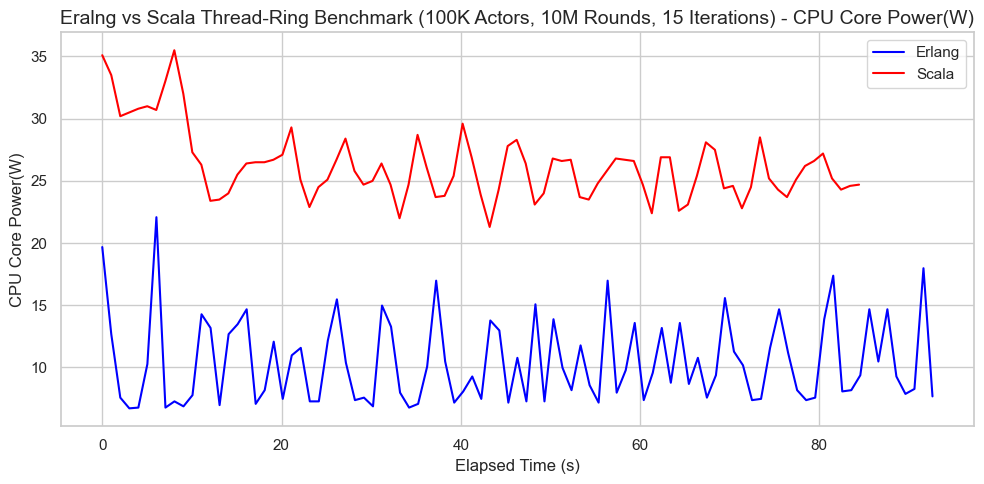

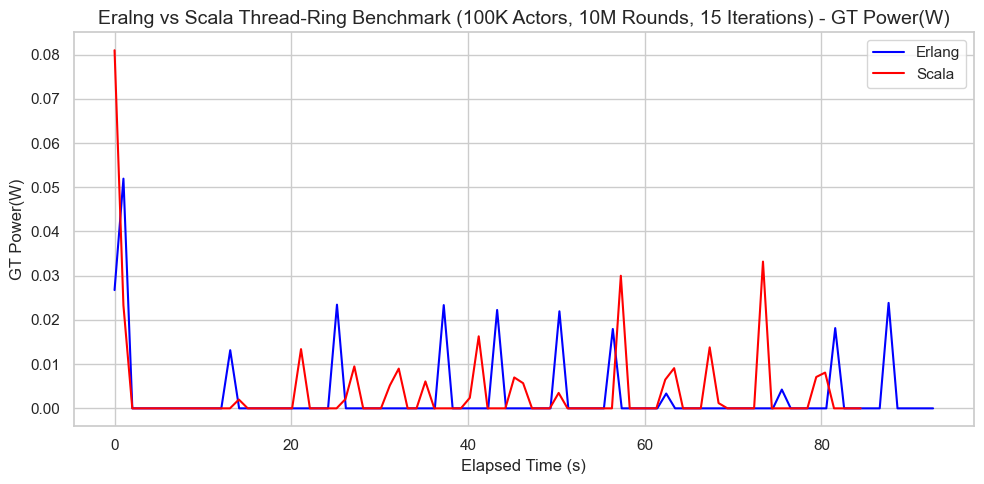

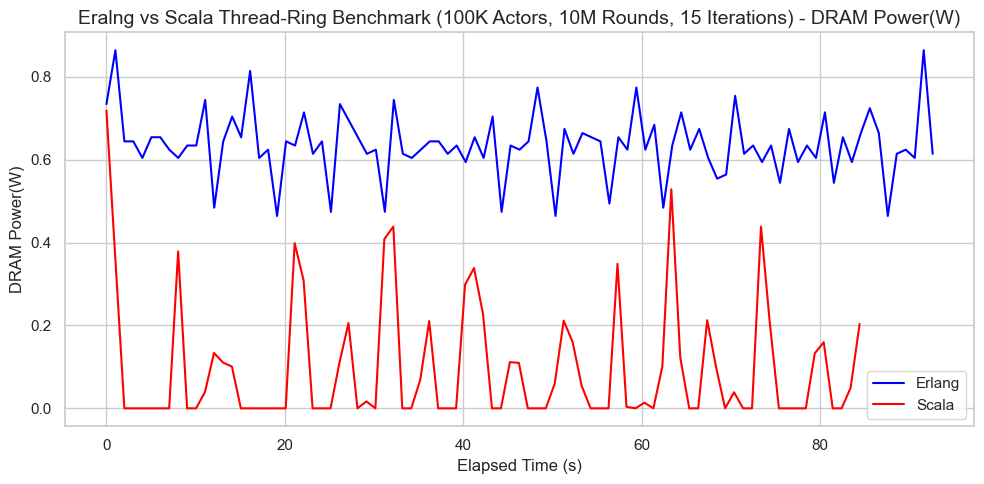

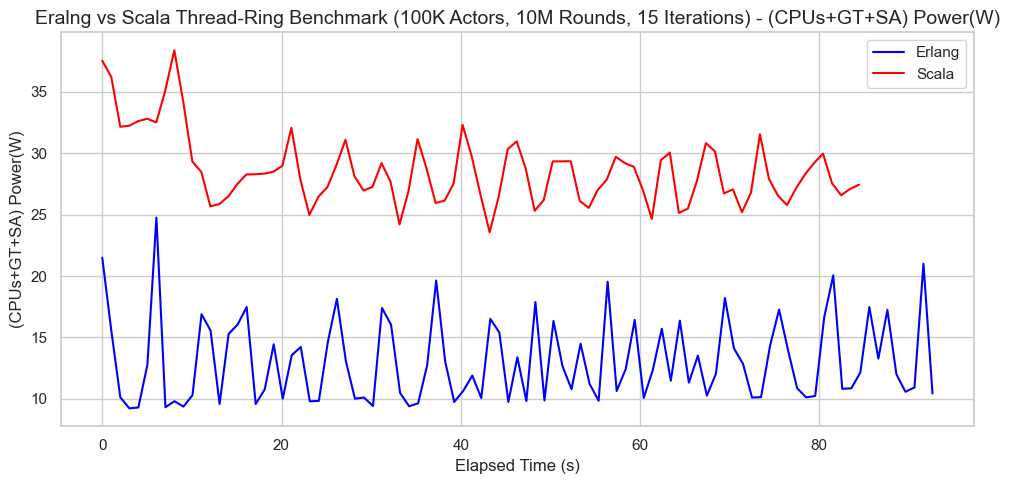

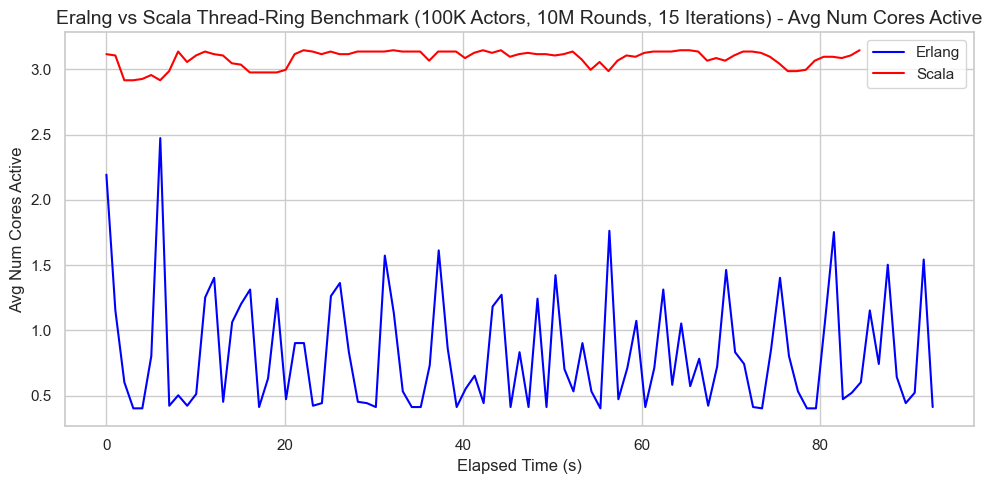

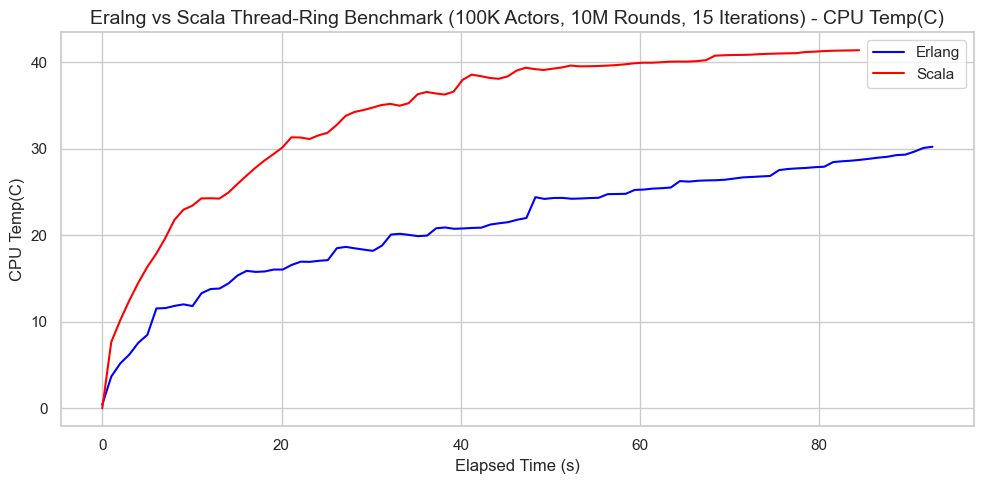

In [17]:
plot_erlang_vs_scala(erlang_bench_data, scala_bench_data, erlang_idle_data, scala_idle_data, f"Eralng vs Scala Thread-Ring Benchmark {title_config_prefix}")


Compute Average Metrics

In [18]:
metrics_columns = ["CPU Core Power(W)", "GT Power(W)", "DRAM Power(W)", "(CPUs+GT+SA) Power(W)","CPU Temp(C)", "Avg Num Cores Active"]

In [19]:
# Compute mean idle values for each metric
scala_idle_means = scala_idle_data[metrics_columns].mean()
erlang_idle_means = erlang_idle_data[metrics_columns].mean()

# Subtract the mean idle values from each row in the benchmark data
scala_net_avgs = (scala_bench_data[metrics_columns] - scala_idle_means).mean()
erlang_net_avgs = (erlang_bench_data[metrics_columns] - erlang_idle_means).mean()

print("Net Average Metrics Comparison:\n")
print("Scala Benchmark:")
print(scala_net_avgs, "\n")
print("Erlang Benchmark:")
print(erlang_net_avgs)

Net Average Metrics Comparison:

Scala Benchmark:
CPU Core Power(W)        26.246118
GT Power(W)              -0.019511
DRAM Power(W)             0.025818
(CPUs+GT+SA) Power(W)    28.613529
CPU Temp(C)              33.901412
Avg Num Cores Active      3.085412
dtype: float64 

Erlang Benchmark:
CPU Core Power(W)        10.456400
GT Power(W)              -0.018462
DRAM Power(W)             0.635475
(CPUs+GT+SA) Power(W)    13.083462
CPU Temp(C)              21.207226
Avg Num Cores Active      0.823860
dtype: float64


Compute Total Energy Consumption

In [20]:
# Calculate total elapsed time
scala_total_time = scala_bench_data["Time Elapsed (ms)"].sum() / 1000
erlang_total_time = erlang_bench_data["Time Elapsed (ms)"].sum() / 1000

# Calculate total elapsed time using timestamps (convert to seconds)
# scala_total_time = (scala_bench_data["Timestamp"].iloc[-1] - scala_bench_data["Timestamp"].iloc[0]).total_seconds()
# erlang_total_time = (erlang_bench_data["Timestamp"].iloc[-1] - erlang_bench_data["Timestamp"].iloc[0]).total_seconds()

# Compute total energy consumption
scala_total_energy = scala_net_avgs["(CPUs+GT+SA) Power(W)"] * scala_total_time
erlang_total_energy = erlang_net_avgs["(CPUs+GT+SA) Power(W)"] * erlang_total_time

# Create a DataFrame for the new row
new_row = pd.DataFrame([{
    "Iterations": ITERATIONS,
    "N": N,
    "R": R,
    "Erlang Energy Consumption(J)": erlang_total_energy,
    "Scala Energy Consumption(J)": scala_total_energy
}])

# Define CSV file path
csv_filename = os.path.join(parent_dir, "aggregate_energy_results.csv")

# Check if the file exists
if os.path.exists(csv_filename):
    # Load existing data
    existing_data = pd.read_csv(csv_filename)
    
    # Check if the row with the same (Number of Messages, Iterations) already exists
    duplicate_row = existing_data[
        (existing_data["N"] == N) & 
        (existing_data["R"] == R) &
        (existing_data["Iterations"] == ITERATIONS)
    ]
    
    if not duplicate_row.empty:
        print("Skipping duplicate entry for N =", N, "R =", R, "and Iterations =", ITERATIONS)
    else:
        # Append new row
        new_row.to_csv(csv_filename, mode='a', header=False, index=False)
        print("Results appended to", csv_filename)
else:
    # Save with header if file does not exist
    new_row.to_csv(csv_filename, mode='w', header=True, index=False)
    print("File created and results saved to", csv_filename)

# Print the computed values
print("\nTotal Energy Consumption Comparison:")
print("Scala Benchmark:", scala_total_energy,"Joules")
print("Erlang Benchmark:", erlang_total_energy,"Joules")


Results appended to ../../data/thread_ring/aggregate_energy_results.csv

Total Energy Consumption Comparison:
Scala Benchmark: 2444.934238805882 Joules
Erlang Benchmark: 1225.1710029316125 Joules
